<a href="https://colab.research.google.com/github/widowswail-03/WiDS/blob/main/linear_regression_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Aim is to predict the marks of students of the test data

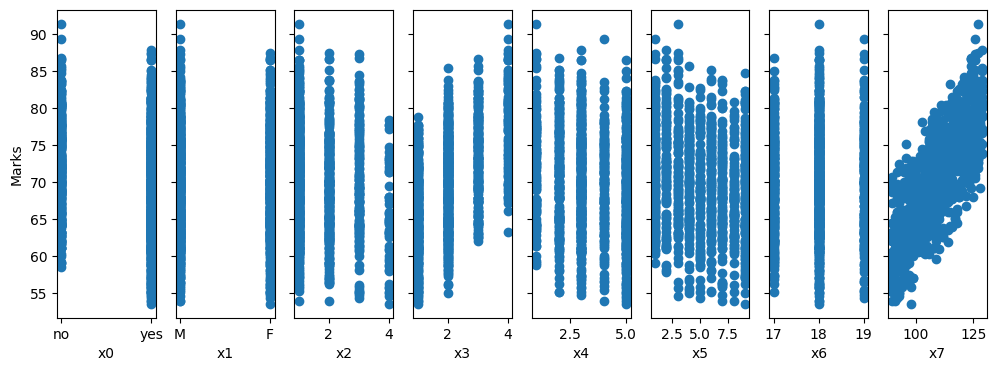

In [91]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train
fig, ax = plt.subplots(1, 8, sharey = True, figsize = (12, 4))
for i in range(len(ax)):
  ax[i].scatter(x_train[:, i], y_train)
  ax[i].set_xlabel(f'x{i}')
ax[0].set_ylabel('Marks')
plt.show()

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
  m,n = x_train.shape
  for i in range(n):
    x_train[:,i] = LabelEncoder().fit_transform(x_train[:,i])
  return x_train

x_train = feature_changing(x_train)

In [92]:
def z_score(x_train):
    x_mean = np.mean(x_train,axis=0)
    x_std = np.std(x_train,axis=0)
    x_train = (x_train - x_mean)/x_std
    return x_train,x_std,x_mean

In [93]:
def cost(x_train,y_train,w,b):
    m = x_train.shape[0]
    for i in range(m):
      loss = np.sum(np.dot(x_train[i], w)+b - y_train[i]**2)/(2*m)
    return loss

In [118]:
def compute_gradient(x_train,y_train,w,b):
    m = x_train.shape[0]
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
      err = np.dot(x_train[i], w) + b - y_train[i]
      for j in range(w.shape[0]):
        dj_dw[j] = dj_dw[j] + err * x_train[i,j]
      dj_db = dj_db + err
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw, dj_db

In [121]:
def gradient_descent(x_train,y_train,w,b, lr=0.0009):
      dj_dw, dj_db = compute_gradient(x_train, y_train, w, b)

      w = w - lr * dj_dw
      b = b - lr * dj_db

      return w,b

In [122]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(214748364)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Optimization required, your accuracy is 0.5%
